In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Used to show a progress bar during the loop for user feedback.
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [5]:
DATADIR = "data/train"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 64

In [8]:
data = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    label = CATEGORIES.index(category) # 0 -> Dog, 1 -> Cat

    for img_name in tqdm(os.listdir(path)):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img.flatten(), label])  # Flattens the 2D image (64x64) to a 1D vector (4096 values)
        except Exception as e:
            pass

# Convert to numpy array
# for every [image, label] in data
X = np.array([i[0] for i in data])  # Features (flattened images)  i[0] is the flattened image 
y = np.array([i[1] for i in data])  # Labels (0 or 1)  i[1] is the label



  0%|          | 0/201 [00:00<?, ?it/s]

100%|██████████| 201/201 [00:02<00:00, 99.06it/s] 


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

Accuracy: 0.49382716049382713
              precision    recall  f1-score   support

         Dog       0.39      0.42      0.41        33
         Cat       0.58      0.54      0.56        48

    accuracy                           0.49        81
   macro avg       0.48      0.48      0.48        81
weighted avg       0.50      0.49      0.50        81



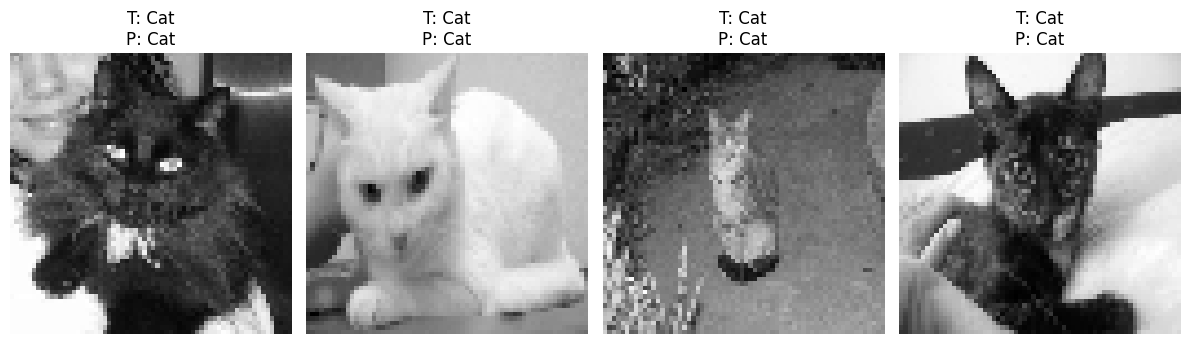

In [16]:
# No of Images to display
num_images = 4

plt.figure(figsize=(12, 6))

for idx in range(num_images):
    sample_image = X_test[idx].reshape(IMG_SIZE, IMG_SIZE)
    true_label = y_test[idx]
    predicted_label = clf.predict([X_test[idx]])[0]

    plt.subplot(1, num_images, idx + 1)  # row, column, index
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"T: {'Dog' if true_label == 0 else 'Cat'}\nP: {'Dog' if predicted_label == 0 else 'Cat'}")
    plt.axis('off')

plt.tight_layout()